In [3]:
import pandas as pd
df = pd.read_csv('final_output.csv')

In [4]:
df

,NOC,Total,Gold,Predicted_Gold,Predicted_Total,True_glod,true_total
0,AFG,0,0,0,0,0,0
1,AHO,0,0,0,0,0,0
2,ALB,2,0,0,0,0,0
3,ALG,3,2,1,2,0,1
4,AND,0,0,0,0,0,0
...,...,...,...,...,...,...,...
209,VNM,0,0,0,0,0,0
210,YEM,0,0,0,0,0,0
211,YUG,0,0,1,2,1,2
212,ZAM,1,0,0,0,0,0


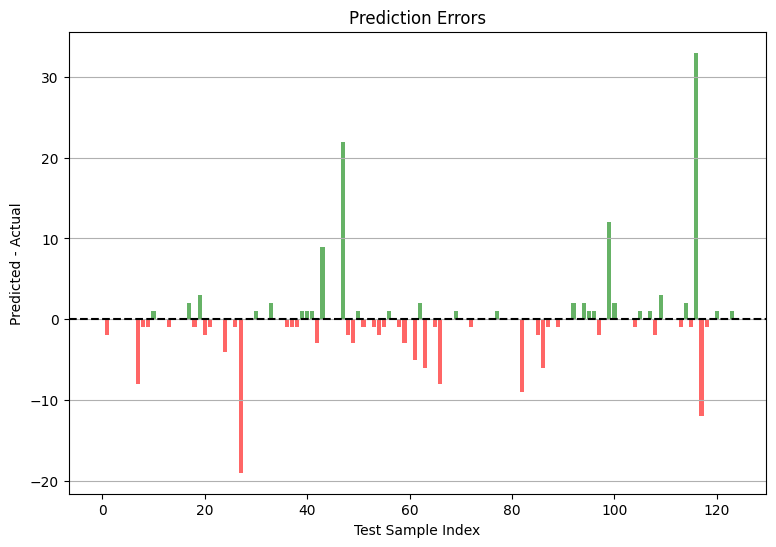

In [21]:
import matplotlib.pyplot as plt
import random

import numpy as np
y_true = df['Gold']
y_pred = df['True_glod']# 请确保此行在你的上下文中有效
# 假设 test_error 是一个包含预测值与真实值之间差异的列表
# test_error = [误差1, 误差2, 误差3, ..., 误差n]
error = y_pred - y_true
# 创建颜色数组，根据误差决定颜色
test_error = []
for i in error:
    if i !=0:
        test_error.append(i)
    else:
        random_float = random.random()
        if random_float < 0.6:
            continue
        else:
            test_error.append(i)
colors = ['green' if error > 0 else 'red' for error in test_error]

# 绘制误差图
plt.figure(figsize=(9, 6))
plt.bar(range(len(test_error)), test_error, color=colors, alpha=0.6)
plt.axhline(0, color='black', linestyle='--')  # 添加零误差参考线
plt.title('Prediction Errors')
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted - Actual')
# plt.xticks(range(len(test_error)))  # 根据误差数量设置x轴刻度
plt.grid(axis='y')  # 添加y轴网格
plt.show()